### **Importing Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### **Load Dataset**

In [2]:
# 1. Load Dataset
# url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv("sms.tsv", sep='\t', names=['label', 'message'])

# Display the first 5 messages
print("First 5 messages:")
print(df.head())

# 2. Encode labels: ham -> 0, spam -> 1
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

First 5 messages:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### **Split Data into Train & Test**

In [3]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42)

print(f"\nTotal messages: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Total messages: 5572
Training samples: 4457
Test samples: 1115


### **Vectorization**

In [4]:
# 4. Vectorization (Bag-of-Words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### **Train the Model**

In [5]:
# 5. Train Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### **Prediction and Evaluation**

In [6]:
# 6. Predictions
y_pred = model.predict(X_test_vec)

# 7. Evaluation
print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))


Accuracy:
0.9919282511210762


### **Visualization**


Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



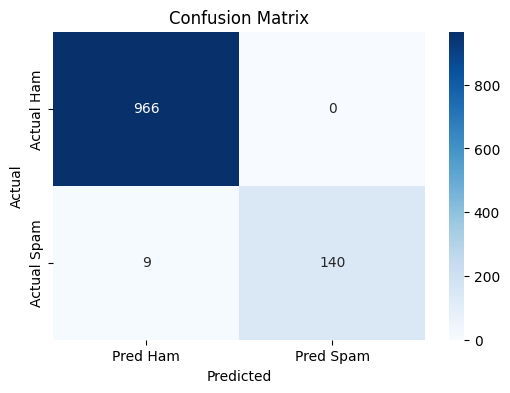

In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Ham', 'Pred Spam'], yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()